### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Habeeba/Documents/ML LAB/DA/machine_failure_cleaned.csv")
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0


### DATASET DESCRIPTION

### The dataset contains the following attributes:
#### Independent Variables:

* Rotational speed [rpm] 
* Torque [Nm]
* Tool wear [min]
* TWF (Tool Wear Failure)
* HDF (Hydraulic Failure)
* PWF (Power Failure)
* OSF (Overstrain Failure)

#### Dependent Variable:

+ Machine failure

#### Description
* Rotational speed [rpm]: This attribute represents the rotational speed of the machine in revolutions per minute (rpm). 
* Torque [Nm]: This attribute indicates the torque applied to the machine components in Newton-meters (Nm).
* Tool wear [min]: This attribute represents the duration of tool wear in minutes.
* TWF (Tool Wear Failure): This attribute is binary, with a value of 1 indicating the occurrence of tool wear failure and 0 indicating its absence.
* HDF (Hydraulic Failure): Similarly binary, with 1 indicating a hydraulic failure and 0 indicating its absence.
* PWF (Power Failure): Binary attribute where 1 indicates a power failure and 0 indicates its absence.
* OSF (Overstrain Failure): Binary attribute indicating the occurrence (1) or absence (0) of an overstrain failure.
* Machine failure: This is the target variable. It's binary, with 1 indicating the occurrence of machine failure and 0 indicating its absence.

### EXPLORATORY ANALYTICS

In [3]:
df.shape

(9815, 8)

In [45]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]          TWF  \
count             9815.000000  9815.000000      9815.000000  9815.000000   
mean              1526.383393    40.330015       107.913602     0.004483   
std                147.306781     9.420254        63.626881     0.066808   
min               1168.000000    16.700000         0.000000     0.000000   
25%               1422.000000    33.600000        53.000000     0.000000   
50%               1501.000000    40.200000       108.000000     0.000000   
75%               1606.000000    46.800000       162.000000     0.000000   
max               2076.000000    68.900000       253.000000     1.000000   

               HDF          PWF          OSF  Machine failure  
count  9815.000000  9815.000000  9815.000000      9815.000000  
mean      0.011717     0.004483     0.009577         0.029139  
std       0.107613     0.066808     0.097398         0.168205  
min       0.000000     0.000000     0.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


#### Distribution of the target variable 

In [5]:
print("\nDistribution of Machinie failure:")
print(df['Machine failure'].value_counts())


Distribution of Machinie failure:
Machine failure
0    9529
1     286
Name: count, dtype: int64


#### Visualize the distribution of the target variable

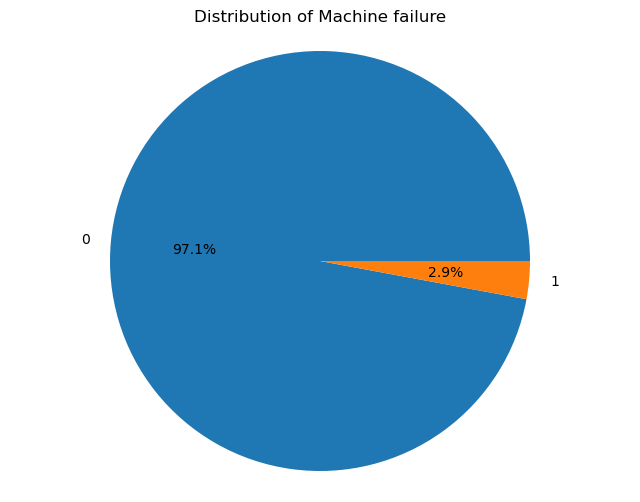

In [6]:
plt.figure(figsize=(8, 6))
machine_failure_counts = df['Machine failure'].value_counts()
plt.pie(machine_failure_counts, labels=machine_failure_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Machine failure')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Distribution of Categorical Variables

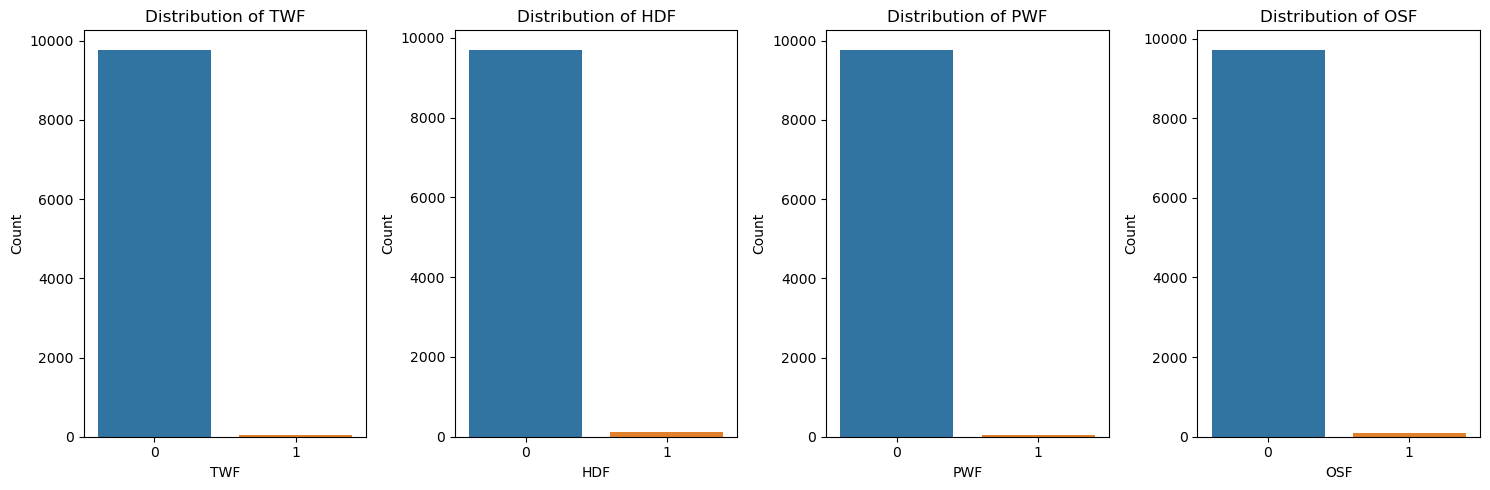

In [7]:
cat_vars = ['TWF','HDF','PWF','OSF']
plt.figure(figsize=(15, 5))
for i, var in enumerate(cat_vars, start=1):
    plt.subplot(1, 4, i)
    sns.countplot(data=df, x=var)
    plt.title('Distribution of ' + var)
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


#### Distribution of Numerical Variables


C:\Users\Habeeba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Habeeba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Habeeba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


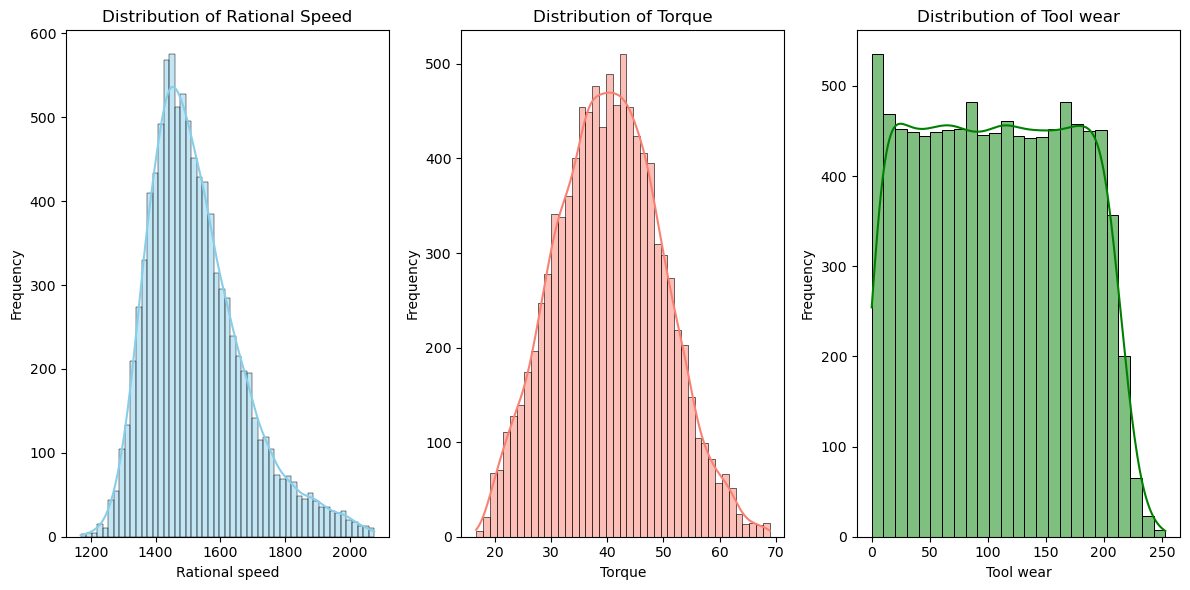

In [8]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Rotational speed [rpm]'], kde=True, color='skyblue')
plt.xlabel('Rational speed')
plt.ylabel('Frequency')
plt.title('Distribution of Rational Speed')

plt.subplot(1, 3, 2)
sns.histplot(df['Torque [Nm]'], kde=True, color='salmon')
plt.xlabel('Torque')
plt.ylabel('Frequency')
plt.title('Distribution of Torque')

plt.subplot(1, 3, 3)
sns.histplot(df['Tool wear [min]'], kde=True, color='green')
plt.xlabel('Tool wear')
plt.ylabel('Frequency')
plt.title('Distribution of Tool wear')

plt.tight_layout()
plt.show()

### PREPROCESSING

### Missing Value Analysis

In [9]:
# Missing value analysis
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Rotational speed [rpm]    0
Torque [Nm]               0
Tool wear [min]           0
TWF                       0
HDF                       0
PWF                       0
OSF                       0
Machine failure           0
dtype: int64


#### No missing values, so no imputation needed

### Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
# Define categorical columns
categorical_columns = ['TWF', 'HDF', 'PWF', 'OSF', 'Machine failure']

# Exclude categorical columns from normalization
numerical_columns = [col for col in df.columns if col not in categorical_columns]

# Normalization (MinMaxScaler) for numerical columns only
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the normalized DataFrame
print("Normalized DataFrame:")
df_normalized

Normalized DataFrame:


,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,0.421806,0.500000,0.000000,0,0,0,0,0
1,0.264317,0.567050,0.011858,0,0,0,0,0
2,0.363436,0.626437,0.019763,0,0,0,0,0
3,0.291850,0.436782,0.027668,0,0,0,0,0
4,0.264317,0.446360,0.035573,0,0,0,0,0
...,...,...,...,...,...,...,...,...
9810,0.480176,0.245211,0.055336,0,0,0,0,0
9811,0.511013,0.289272,0.067194,0,0,0,0,0
9812,0.525330,0.319923,0.086957,0,0,0,0,0
9813,0.264317,0.609195,0.098814,0,0,0,0,0


### Encoding 
#### No categorical features to encode


### Linearity Analysis

In [11]:
# Linearity analysis (correlation matrix)
print("Correlation Matrix:")
df_normalized.corr()

Correlation Matrix:


,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
Rotational speed [rpm],1.000000,-0.896284,0.001777,0.005334,-0.139800,-0.073791,-0.115386,-0.169215
Torque [Nm],-0.896284,1.000000,-0.003309,-0.011191,0.148383,0.173528,0.182073,0.236320
Tool wear [min],0.001777,-0.003309,1.000000,0.113977,-0.001236,-0.009473,0.154905,0.115228
TWF,0.005334,-0.011191,0.113977,1.000000,-0.007307,0.018326,0.040379,0.387345
HDF,-0.139800,0.148383,-0.001236,-0.007307,1.000000,0.035212,0.047622,0.628498
PWF,-0.073791,0.173528,-0.009473,0.018326,0.035212,1.000000,0.118676,0.387345
OSF,-0.115386,0.182073,0.154905,0.040379,0.047622,0.118676,1.000000,0.567609
Machine failure,-0.169215,0.236320,0.115228,0.387345,0.628498,0.387345,0.567609,1.000000


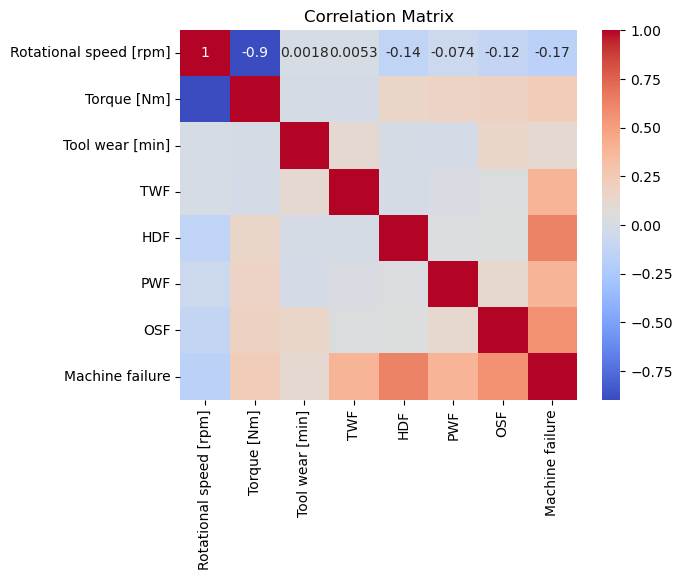

In [12]:
corr_matrix = df_normalized.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Class Imbalance Analysis

In [13]:
# Class imbalance analysis
class_counts = df['Machine failure'].value_counts()
print("Class Counts:")
print(class_counts)

Class Counts:
Machine failure
0    9529
1     286
Name: count, dtype: int64


In [14]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target variable
X = df_normalized[['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF']]
y = df_normalized['Machine failure']

print("Original class distribution:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a DataFrame with the resampled features and target variable
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)  # Assuming columns are labeled in your original DataFrame
balanced_data['Machine failure'] = y_resampled  # Assuming the target variable column is named 'Machine failure'

# Check the class distribution of the balanced dataset
print("Resampled class distribution:", Counter(y_resampled))

# Print the first few rows of the balanced dataset
print(balanced_data.head())
balanced_data.shape

Original class distribution: Counter({0: 9529, 1: 286})
Resampled class distribution: Counter({0: 9529, 1: 9529})
   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  \
0                0.421806     0.500000         0.000000    0    0    0    0   
1                0.264317     0.567050         0.011858    0    0    0    0   
2                0.363436     0.626437         0.019763    0    0    0    0   
3                0.291850     0.436782         0.027668    0    0    0    0   
4                0.264317     0.446360         0.035573    0    0    0    0   

   Machine failure  
0                0  
1                0  
2                0  
3                0  
4                0  


(19058, 8)

### ALGORITHM IMPLEMENTATION

### DECISION TREE

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your dataset is stored in a DataFrame named 'df'
X = balanced_data[['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF']]
y = balanced_data['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


#### Visualizing the decision tree

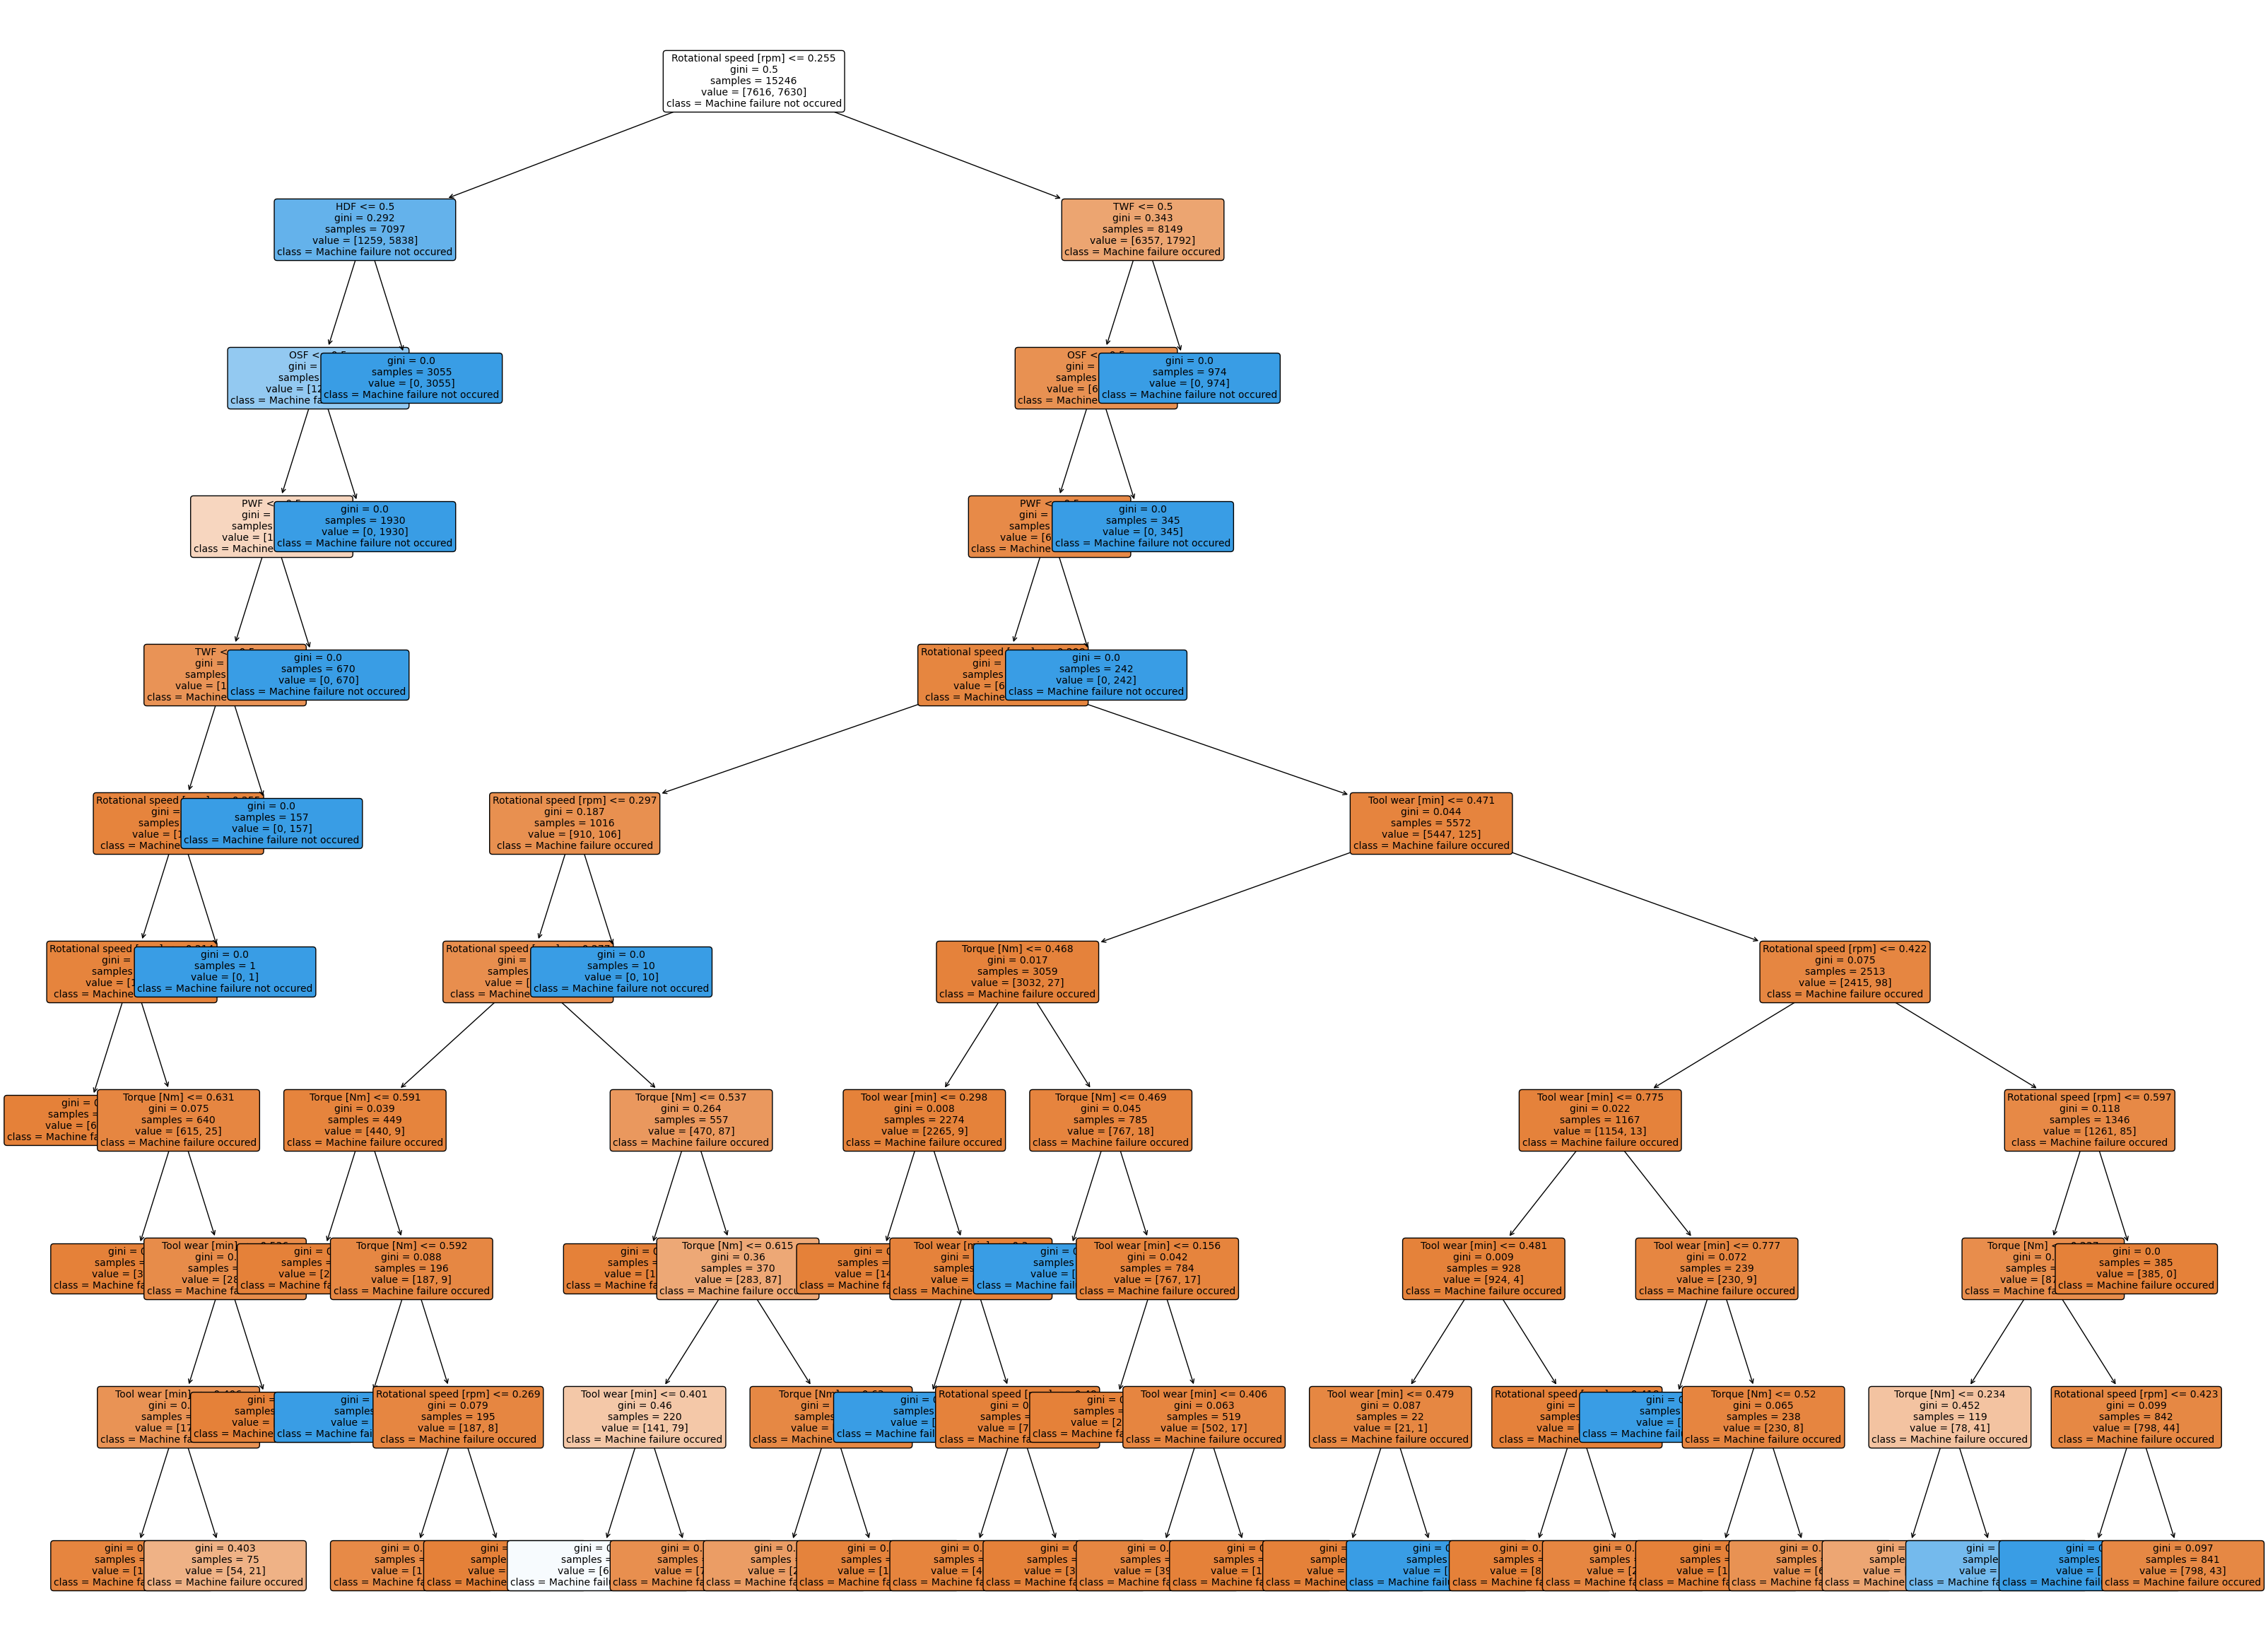

In [16]:
from sklearn import tree
plt.figure(figsize=(40, 30))
tree.plot_tree(model, feature_names=['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF'], class_names=['Machine failure occured','Machine failure not occured'],
               filled=True, rounded=True, fontsize=10)
plt.show()

In [17]:
# Model prediction
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [18]:
#Model evaluation
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, ConfusionMatrixDisplay
acc = accuracy_score(y_pred,y_test)
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

Accuracy: 0.9863588667366212
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1913
           1       0.99      0.98      0.99      1899

    accuracy                           0.99      3812
   macro avg       0.99      0.99      0.99      3812
weighted avg       0.99      0.99      0.99      3812



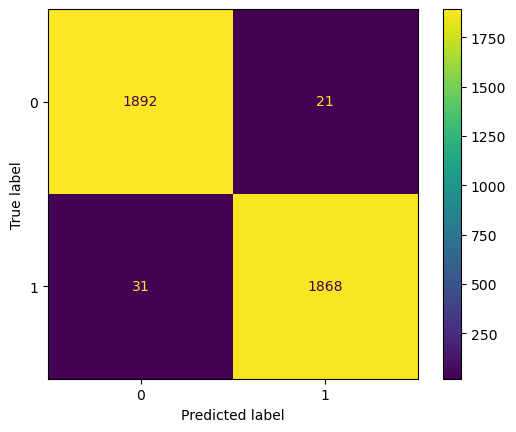

In [19]:
# Demo the evaluation
print('Accuracy:',acc)
print(classification_report(y_test,y_pred))
cm_display.plot()
plt.show()

### NAIVE BAYES

In [20]:
# Split the dataset into features (X) and target variable (y)
X = balanced_data[['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF']]
y = balanced_data['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train a Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [22]:
# Make predictions on the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9860965372507869


In [23]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1913    0]
 [  53 1846]]


In [24]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1913
           1       1.00      0.97      0.99      1899

    accuracy                           0.99      3812
   macro avg       0.99      0.99      0.99      3812
weighted avg       0.99      0.99      0.99      3812



### ENSEMBLING BOTH THE ALGORITHMS

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming your dataset is stored in a DataFrame named 'df_normalized'
X = balanced_data[['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF']]
y = balanced_data['Machine failure']
# Define classifiers
decision_tree_clf = DecisionTreeClassifier()
naive_bayes_clf = GaussianNB()

# Create a voting classifier with custom weights
voting_clf = VotingClassifier(
    estimators=[('dt', decision_tree_clf), ('nb', naive_bayes_clf)],
    voting='soft',  # Soft voting returns the class label as the argmax of the sum of predicted probabilities
    weights=[0.7, 0.3]  # Adjust weights based on performance or domain knowledge
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9876705141657922
Confusion Matrix:
 [[1888   25]
 [  22 1877]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1913
           1       0.99      0.99      0.99      1899

    accuracy                           0.99      3812
   macro avg       0.99      0.99      0.99      3812
weighted avg       0.99      0.99      0.99      3812



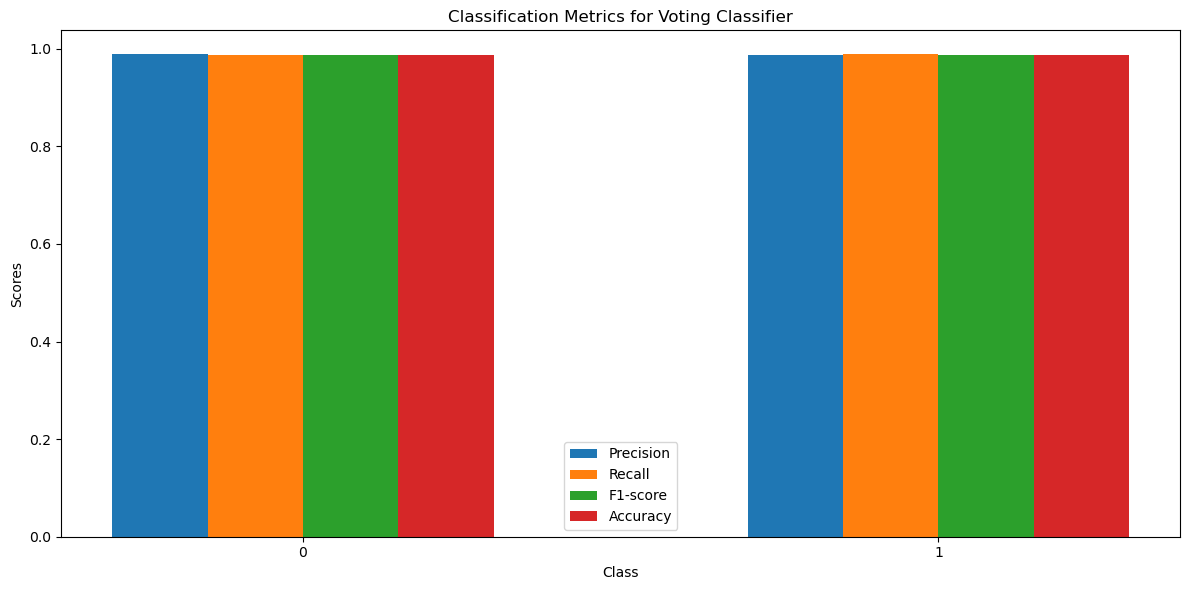

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculate classification metrics
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
accuracy = accuracy_score(y_test, y_pred)

# Create a bar plot
labels = np.unique(y_test)
x = np.arange(len(labels))
width = 0.15

plt.figure(figsize=(12, 6))

plt.bar(x - 1.5*width, precision, width, label='Precision')
plt.bar(x - 0.5*width, recall, width, label='Recall')
plt.bar(x + 0.5*width, f1, width, label='F1-score')
plt.bar(x + 1.5*width, [accuracy] * len(labels), width, label='Accuracy')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Classification Metrics for Voting Classifier')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


### IMPLEMENTATION OF ENSEMBLE ALGORITHM

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = balanced_data[['Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','TWF','HDF','PWF','OSF']]
y = balanced_data['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

# Perform grid search with cross-validation
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Get the best model from the grid search
rf_best_model = rf_grid.best_estimator_

# Make predictions using the best model
rf_best_predictions = rf_best_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_best_predictions)

conf_matrix = confusion_matrix(y_test, rf_best_predictions)

# Print the results
print("\nResults Analysis for Random Forest (Bagging):")
print("Best Parameters:", rf_grid.best_params_)
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:")
print(conf_matrix)



Results Analysis for Random Forest (Bagging):
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Accuracy: 0.9908184679958028
Confusion Matrix:
[[1907    6]
 [  29 1870]]


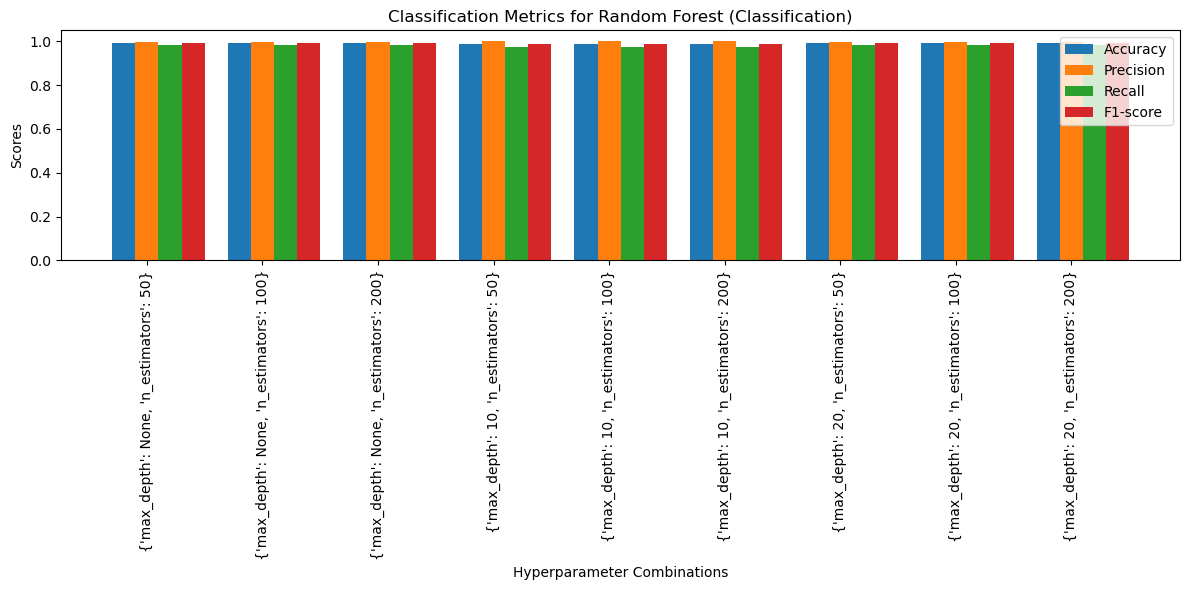

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Extracting evaluation metrics from the classification report
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for params, mean_score in zip(rf_grid.cv_results_['params'], rf_grid.cv_results_['mean_test_score']):
    rf_model.set_params(**params)  # Set the hyperparameters for the model
    rf_model.fit(X_train, y_train)  # Fit the model
    y_pred = rf_model.predict(X_test)  # Make predictions
    
    # Calculate classification metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Create a bar plot
labels = [str(params) for params in rf_grid.cv_results_['params']]
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(12, 6))

plt.bar(x - width, accuracy_scores, width, label='Accuracy')
plt.bar(x, precision_scores, width, label='Precision')
plt.bar(x + width, recall_scores, width, label='Recall')
plt.bar(x + 2*width, f1_scores, width, label='F1-score')

plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Scores')
plt.title('Classification Metrics for Random Forest (Classification)')
plt.xticks(x, labels, rotation='vertical')
plt.legend()
plt.tight_layout()
plt.show()


### COMPARISON AND ANALYSIS

Both result1, obtained from ensembling a Decision Tree Classifier with a Naive Bayes Classifier, and result2, obtained from a Random Forest Classifier, exhibit high accuracy. Result1 achieved an accuracy of 0.98767, while result2 achieved a slightly higher accuracy of 0.99082. Looking at the confusion matrices, both models have a similar number of misclassifications, with slightly more false negatives in result2. In result1, there are 20 false positives and 22 false negatives, while in result2, there are 6 false positives and 29 false negatives. Precision, recall, and F1-score for both classes are high for both models, indicating robust performance.

However, the preference leans towards the Random Forest Classifier (result2) due to its slightly higher accuracy and the optimal hyperparameters selected through grid search. Random Forest is an ensemble learning method that combines multiple decision trees to improve generalization and robustness. Unlike the Voting Classifier used in result1, which combines different algorithms, Random Forest builds multiple decision trees independently and then combines their predictions, reducing the risk of overfitting. Additionally, Random Forest handles high-dimensional data well and is less sensitive to outliers and noisy data compared to individual decision trees.

Furthermore, the Random Forest model inherently provides feature importance, which can be valuable for understanding the underlying relationships in the data. This makes it easier to interpret the model's predictions and identify the most influential features. Overall, while both models demonstrate strong performance, the Random Forest Classifier offers slightly better accuracy and robustness, making it the preferred choice for this classification task.ask.

#### DATASET USED

https://www.kaggle.com/datasets/ikjotsingh221/machine-failure-cleaned